# Diffusion Ray Curvature toy tests

In [2]:
import numpy as np
import graphtools
import matplotlib.pyplot as plt
from pecan import data
from pecan.curvature import DiffusionRayCurvature
%load_ext autoreload
%autoreload 2

# The Plane

In [5]:
X = np.mgrid[0:4:0.05, 0:4:0.05].reshape(2,-1).T

In [6]:
%%time
drc = DiffusionRayCurvature(X,num_steps=40)

CPU times: user 948 ms, sys: 240 ms, total: 1.19 s
Wall time: 449 ms


In [7]:
%%time
pointwise_curvatures = drc.pointwise_curvature()

100%|██████████| 6400/6400 [11:16<00:00,  9.46it/s]CPU times: user 37min 34s, sys: 5min 4s, total: 42min 38s
Wall time: 11min 16s



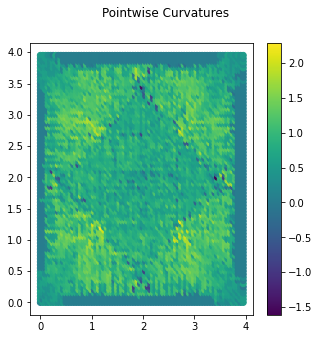

In [8]:
# visualize
fig = plt.figure(figsize=(5,5))
fig.suptitle(f"Pointwise Curvatures")
ax1 = plt.subplot(1,1,1)
im = ax1.scatter(X[:,0],X[:,1],c=pointwise_curvatures)
fig.colorbar(im, ax=ax1)

# The Sphere

In [10]:
X = data.sphere(6400)

In [11]:
%%time
drc = DiffusionRayCurvature(X,num_steps=40,knn=10)

CPU times: user 1.08 s, sys: 186 ms, total: 1.27 s
Wall time: 477 ms


In [12]:
%%time
pointwise_curvatures = drc.pointwise_curvature()

100%|██████████| 6400/6400 [23:22<00:00,  4.56it/s]CPU times: user 1h 19min 23s, sys: 10min 26s, total: 1h 29min 49s
Wall time: 23min 22s



In [13]:
# Import dependencies
import plotly
import plotly.graph_objs as go
import plotly.express as px
import pandas as pd

# Configure Plotly to be rendered inline in the notebook.
plotly.offline.init_notebook_mode()
def plot_3d(X,distribution,title="",lim=1):
    d = {'x':X[:,0],'y':X[:,1],'z':X[:,2],'colors':distribution}
    df = pd.DataFrame(data=d)
    fig = px.scatter_3d(df, x='x',y='y',z='z',color='colors', title=title)
    fig.show()

In [14]:
plot_3d(X,pointwise_curvatures,title="Pointwise Curvature")

In [15]:
pointwise_curvatures

array([0.76310556, 0.95303821, 0.88645985, ..., 0.15476637, 1.01875619,
       0.86784574])

# On the Donut

In [20]:
X = data.torus(2000)

In [21]:
%%time
drc = DiffusionRayCurvature(X,num_steps=20,knn=10)

CPU times: user 949 ms, sys: 230 ms, total: 1.18 s
Wall time: 389 ms


In [22]:
%%time
pointwise_curvatures = drc.pointwise_curvature()

100%|██████████| 2000/2000 [01:36<00:00, 20.70it/s]CPU times: user 1min 32s, sys: 2.56 s, total: 1min 35s
Wall time: 1min 36s



In [23]:
plot_3d(X,pointwise_curvatures,title="Pointwise Curvature")